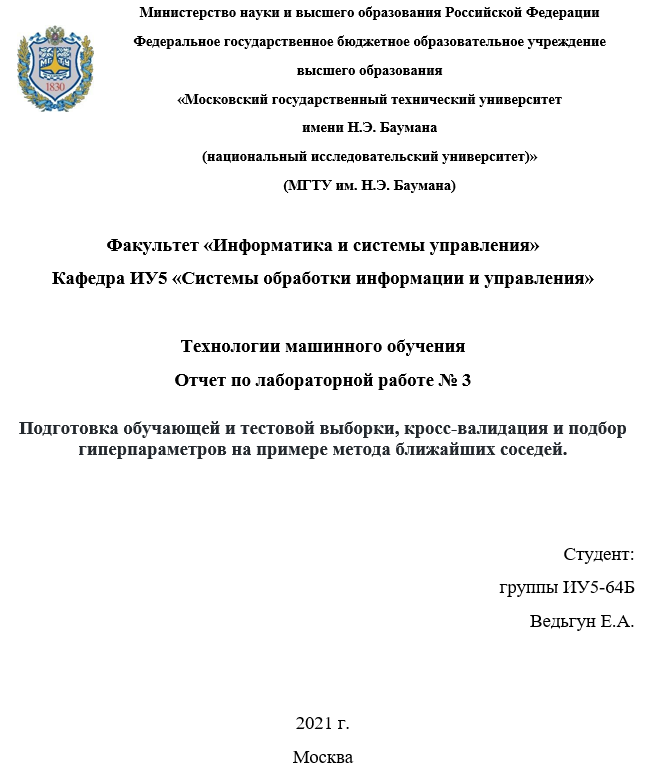

# Цель лабораторной работы:
изучение способов подготовки выборки и подбора
гиперпараметров на примере метода ближайших соседей.
# Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей. 

## Импорт библиотек

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
import matplotlib.ticker as ticker
import math
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
%matplotlib inline
sns.set(style="ticks")

## Выборка датасета и ее разделение на тестовую и обучающую

In [5]:
# Загрузка данных
bc = load_breast_cancer()
for x in bc:
    print(x)

data
target
frame
target_names
DESCR
feature_names
filename


In [6]:
# Сформируем DataFrame
bc_df = pd.DataFrame(data= np.c_[bc['data'], bc['target']],
columns= list(bc['feature_names']) + ['target'])
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [9]:
bc_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
sc = MinMaxScaler()
bc_sc = sc.fit_transform(bc.data)
X_train, X_test, Y_train, Y_test = train_test_split(
bc_sc, bc.target, test_size=0.33, random_state=1)
X_train

array([[0.55274741, 0.25059182, 0.53631401, ..., 0.57525773, 0.26197516,
        0.19362456],
       [0.2607317 , 0.24146094, 0.24462719, ..., 0.0956701 , 0.06938695,
        0.04394595],
       [0.282976  , 0.29015894, 0.27910994, ..., 0.22707904, 0.32367435,
        0.11432507],
       ...,
       [0.48364807, 0.50084545, 0.48655933, ..., 0.65257732, 0.34456929,
        0.51725043],
       [0.3336173 , 0.3902604 , 0.31787713, ..., 0.27364261, 0.13029765,
        0.13859373],
       [0.28628899, 0.29455529, 0.26826066, ..., 0.17226804, 0.08318549,
        0.043618  ]])

In [13]:
Y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [15]:
X_test

array([[0.36485399, 0.14440311, 0.37613157, ..., 0.38075601, 0.24876799,
        0.24294897],
       [0.29291495, 0.30267163, 0.29154861, ..., 0.71752577, 0.46027991,
        0.41230487],
       [0.28250272, 0.21339195, 0.27192316, ..., 0.3628866 , 0.35777646,
        0.26761118],
       ...,
       [0.60717497, 0.42069665, 0.59574321, ..., 0.82061856, 0.23713779,
        0.13846255],
       [0.49642671, 0.50625634, 0.49968903, ..., 0.59140893, 0.1172876 ,
        0.24898334],
       [0.29906763, 0.40108218, 0.28643494, ..., 0.19292096, 0.2113148 ,
        0.07569198]])

## Обучение модели и оценка ее качества

In [16]:
# 2 ближайших соседа
reg1_1 = KNeighborsClassifier(n_neighbors=2)
reg1_1.fit(X_train,Y_train)
target1_1 = reg1_1.predict(X_test)
len(target1_1), target1_1

(188,
 array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]))

In [17]:
accuracy_score(Y_test, target1_1)

0.9574468085106383

## Кросс-валидация

In [18]:
scoring = {'precision': 'precision_weighted','recall': 'recall_weighted','f1': 'f1_weighted'}
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), bc_sc, bc.target, scoring=scoring, cv=kf, 
return_train_score=True)
scores

{'fit_time': array([0.01185966, 0.        , 0.        , 0.        , 0.        ]),
 'score_time': array([0.02743316, 0.01569033, 0.01821709, 0.01678801, 0.01561689]),
 'test_precision': array([0.95613188, 0.95010337, 0.96514312, 0.9591089 , 0.93459708]),
 'train_precision': array([0.98734066, 0.97166449, 0.97727737, 0.97332362, 0.97722415]),
 'test_recall': array([0.95614035, 0.94736842, 0.96491228, 0.95614035, 0.92035398]),
 'train_recall': array([0.98681319, 0.96923077, 0.97582418, 0.97142857, 0.97587719]),
 'test_f1': array([0.95605944, 0.94756499, 0.96469636, 0.95682492, 0.92340952]),
 'train_f1': array([0.98688352, 0.96948639, 0.97595915, 0.97156884, 0.9759728 ])}

In [20]:
kf1 = LeaveOneOut()
scores1 = cross_validate(KNeighborsClassifier(n_neighbors=2), bc_sc, bc.target, scoring=scoring, cv=kf1, 
return_train_score=True)
scores1

C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall

C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall

C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.01667786, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01700258, 0.        , 0.        , 0.00668573,
        0.00103021, 0.        , 0.00463772, 0.00303268, 0.00705338,
        0.0020442 , 0.00417709, 0.0056839 , 0.00204754, 0.00704646,
        0.00824356, 0.        , 0.00671268, 0.        , 0.0065825 ,
        0.00489593, 0.00310564, 0.00705957, 0.00204682, 0.00313616,
        0.00499487, 0.        , 0.00405884, 0.00775146, 0.00717807,
        0.00498843, 0.00769663, 0.00694036, 0.01809764, 0.00603819,
        0.00803947, 0.01025748, 0.01571274, 0.00236964, 0.00815177,
        0.        , 0.        , 0.01561904, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00763798,
        0.        , 0.01562238, 0.01562047, 0.        , 0.        ,
        0.00292349, 0.00099659, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00202394, 0.00205898,
        0.        , 0.00940251, 0.00

## Оптимизация гиперпараметров
### Leave one out

In [25]:
n_range = np.array(range(1,70,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
         69])}]

In [27]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf1,
scoring='accuracy')
clf_gs.fit(X_train, Y_train)

Wall time: 43.9 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69])}],
             scoring='accuracy')

In [29]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00177841, 0.00149907, 0.00228437, 0.00214357, 0.0020039 ,
        0.00225934, 0.00162905, 0.00240006, 0.00251392, 0.00187176,
        0.00217671, 0.00224126, 0.00216767, 0.00175643, 0.00134995,
        0.00166901, 0.00190611, 0.00243013, 0.00195759, 0.0018745 ,
        0.00158304, 0.00212088, 0.00211013, 0.00159868, 0.00214161,
        0.00198731, 0.00212107, 0.00175123, 0.00252988, 0.00171713,
        0.00204997, 0.00185329, 0.00191856, 0.00181381, 0.00194552]),
 'std_fit_time': array([0.00482156, 0.00452846, 0.00399952, 0.00392552, 0.00284264,
        0.00303665, 0.00387841, 0.0038056 , 0.00344799, 0.00243317,
        0.00335352, 0.00331666, 0.0025353 , 0.00478188, 0.0042138 ,
        0.00389839, 0.00410567, 0.00362452, 0.00438373, 0.00379516,
        0.00283061, 0.00251419, 0.00197514, 0.00347355, 0.00242165,
        0.00263446, 0.00263329, 0.00409071, 0.00289292, 0.00356403,
        0.00250083, 0.00454721, 0.00493314, 0.00486133, 0.00373786]),
 'mean_scor

In [30]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [31]:
# Лучшее значение метрики
clf_gs.best_score_

0.973753280839895

In [32]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 15}

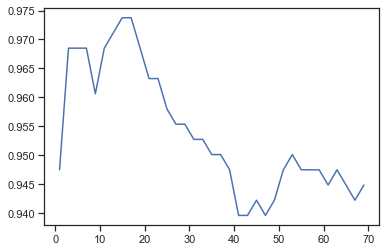

In [33]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [34]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf1,
scoring='accuracy')
clf_rs.fit(X_train, Y_train)

Wall time: 11.7 s


RandomizedSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69])}],
                   scoring='accuracy')

## K-Fold

In [35]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf,
scoring='accuracy')
clf_gs.fit(X_train, Y_train)

Wall time: 1.61 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69])}],
             scoring='accuracy')

In [36]:
clf_gs.best_score_, clf_gs.best_params_

(0.9659945317840055, {'n_neighbors': 3})

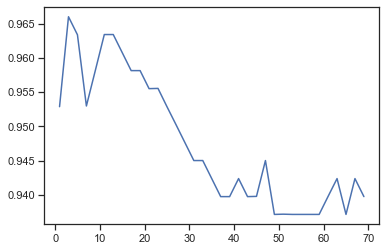

In [37]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [38]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf,
scoring='accuracy')
clf_rs.fit(X_train, Y_train)

Wall time: 602 ms


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69])}],
                   scoring='accuracy')

In [39]:
clf_rs.best_score_, clf_rs.best_params_

(0.9633971291866027, {'n_neighbors': 13})